# Refresher course - Introduction to Python for Data Science

## Table of contents
1. [Basics of Python](https://curiousml.github.io/teaching/epita-python/1_introduction_python.html), see [Notebook](https://curiousml.github.io/teaching/epita-python/1_introduction_python.ipynb) *
2. [Scientific computing](https://curiousml.github.io/teaching/epita-python/3_scientific_computing.html) (**Numpy**, Scipy), see [Notebook](https://curiousml.github.io/teaching/epita-python/3_scientific_computing.ipynb) *
3. [Data visualization](https://curiousml.github.io/teaching/epita-python/4_dataviz.html) (Matplotlib), see [Notebook](https://curiousml.github.io/teaching/epita-python/4_dataviz.ipynb)
4. [Data manipulation](https://curiousml.github.io/teaching/epita-python/5_dataframe.html) (**Pandas**), see [Notebook](https://curiousml.github.io/teaching/epita-python/5_dataframe.ipynb) *

[Exercices](#exos) *

\* Indicates the notebooks we should prioritize for this refresher course. After completing the first two (*), we shift our attention to the following sections [Data manipulation: application to car insutance data](#insurance) and [Exercices](#exos).


## 4. Data manipulation: application to car insurance data <a name="insurance"></a>

- [Introduction to DataFrames](#1)
- [Data representation](#2)
- [Data manipulation](#3)
- [Concatenate dataframes](#4)
- [Descriptive statistics with Pandas](#5)
- [Data visualization with Pandas](#6)

### 4.1. Introduction to Dataframes <a name="1"></a>

This formation explore how to represent and manipulate data and more preciselly [datasets](https://en.wikipedia.org/wiki/Data_set). Simply put, a dataset is just a collection of data often represented by **tables** where:
- each **column** of a table represents a variable (e.g. height, weight, age, grade, ...)
- and each **row** of a table represents an observation (just one case) of a variable.

The most well-known package in Python for handling efficiently data as a two-dimensional table is [pandas](https://pandas.pydata.org/) which provides a container for tables, called *Dataframe*.

The main features of Pandas and its dataframe are:
- reading data from csv and Excel files;
- giving names to variables and index to observations;
- providing methods for visualization and descriptive statistics.

Like always, in a terminal (e.g. anaconda prompt), you can install the package `pandas` with the command:
```
pip install pandas
```
We note that pandas is frequently renamed as `pd`.

In [1]:
import pandas as pd

/var/folders/m4/k43tzd855_9_xmg27cdw1h6c0000gn/T/ipykernel_29535/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Below you will find the main differences between list, array and dataframe:

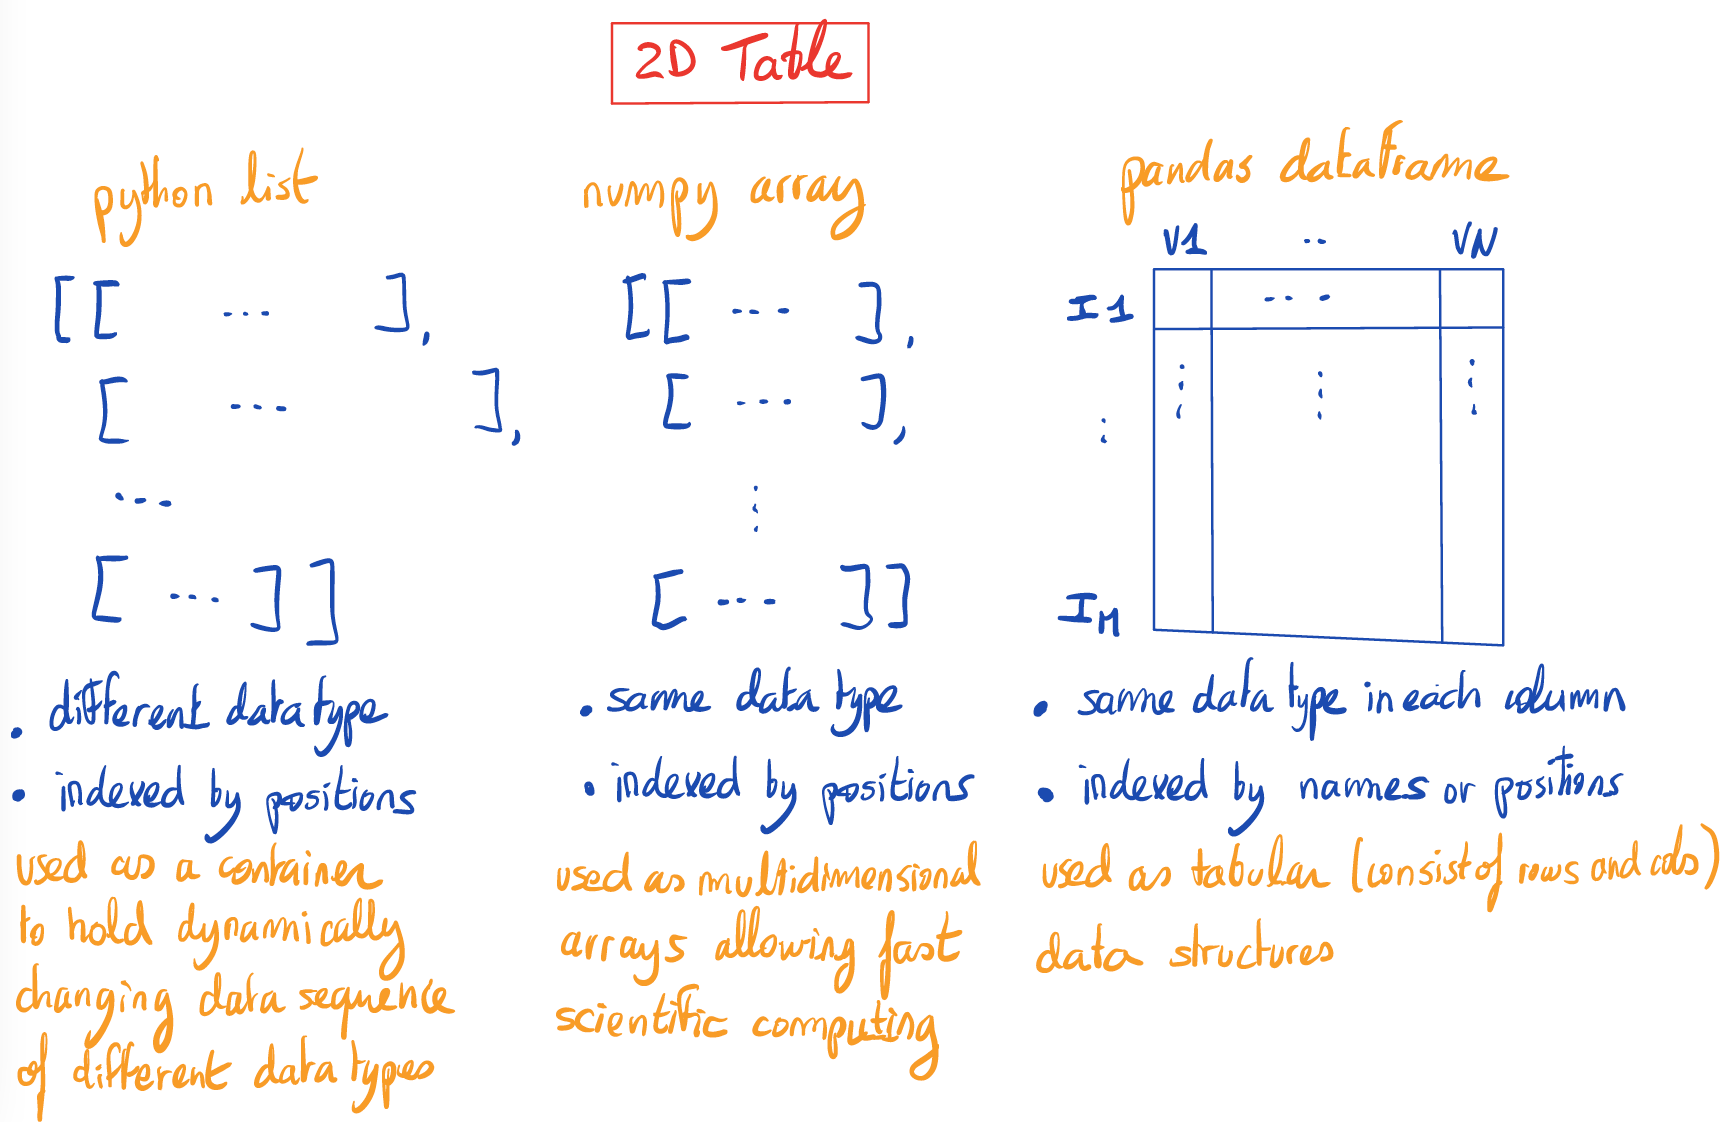

### 4.2. Data representation <a name="2"></a>

#### Creating a dataframe

there are many ways for creating a dataframe from scratch:

1. specify the data (python list or numpy array), the index and the column
2. specify feature by feature (columns) thanks to a dictionary

In [2]:
import numpy as np

df1 = pd.DataFrame(data = np.random.rand(6,4),
                   index = ["u", "v", "w", "x", "y", "z"], # if not specified, it will be 0, 1, .. 5
                   columns = ["a", "b", "c", "d"]) # if not specified, it will be 0, 1, .. 5
df1

,a,b,c,d
u,0.201277,0.320408,0.453224,0.243767
v,0.281429,0.689944,0.103714,0.862750
w,0.180298,0.045977,0.435469,0.742889
x,0.316434,0.463128,0.809195,0.785083
y,0.948644,0.514761,0.727553,0.572775
z,0.418885,0.077831,0.978647,0.455101


In [3]:
df2 = pd.DataFrame({'a' : 1.,                                                           # Single item
                    'b' : "same",                                                       # Single item
                    'c' : np.random.rand(5),                                            # Multiple item
                    'd' : pd.Categorical(["test", "train", "train", "train", "test"])}) # Multiple item
df2

,a,b,c,d
0,1.0,same,0.468508,test
1,1.0,same,0.511071,train
2,1.0,same,0.904916,train
3,1.0,same,0.778667,train
4,1.0,same,0.359227,test


Like dictionaries, it is possible to add a new column (e.g. `column_name`) with values `values`:
```
df[column_name] = values
```

In [4]:
# let us add `e` to df1
df1['e'] = np.random.randint(0, 2, size=df1.shape[0])
df1

,a,b,c,d,e
u,0.201277,0.320408,0.453224,0.243767,0
v,0.281429,0.689944,0.103714,0.862750,0
w,0.180298,0.045977,0.435469,0.742889,1
x,0.316434,0.463128,0.809195,0.785083,0
y,0.948644,0.514761,0.727553,0.572775,0
z,0.418885,0.077831,0.978647,0.455101,1


#### Reading a dataframe

Reading an existing dataframe using the `read_csv` method (refer to the documentation for more details). We will be analyzing the French car insurance data, freMPL, which can be downloaded [here](https://github.com/curiousML/curiousml.github.io/blob/master/teaching/epita-python/freMPL.csv). For information about the dataset, please consult the documentation available [here](http://cas.uqam.ca/pub/web/CASdatasets-manual.pdf).

In [5]:
# we gave the file path, how the values are separated in the file and the column chosen for being the observations index
raw_data = pd.read_csv('freMPL.csv')
raw_data

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,y,RiskVar,Garage
0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage
3,447,0,Male,Alone,CSP48,Professional,58,0,50,sedan,K,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,18,NaN
4,408,8-9,Female,Other,CSP50,Private+trip to office,54,0,54,other microvan,J,injection,regular,180-190 km/h,M1,GOOD,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12432,528,0,Male,Other,CSP60,Private,64,0,50,bus,L,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,8,NaN
12433,327,0,Female,Other,CSP55,Private+trip to office,46,0,50,sedan,M,direct injection overpowered,diesel,190-200 km/h,M2,GOOD,14,NaN
12434,575,1,Male,Other,CSP55,Private+trip to office,74,0,50,other microvan,N,direct injection overpowered,diesel,170-180 km/h,H,GOOD,1,NaN
12435,430,1,Male,Other,CSP66,Professional,55,0,50,sedan,J,injection,regular,190-200 km/h,B,GOOD,16,Collective garage


#### Viewing a dataframe

Instead of viewing the table in whole, pandas provides different methods for sneaking at it.

In [6]:
raw_data.head(n=3) # first 3 rows / observations of the table

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,y,RiskVar,Garage
0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage


In [7]:
raw_data.tail(n=3) # last 3 rows / observations of the table

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,y,RiskVar,Garage
12434,575,1,Male,Other,CSP55,Private+trip to office,74,0,50,other microvan,N,direct injection overpowered,diesel,170-180 km/h,H,GOOD,1,NaN
12435,430,1,Male,Other,CSP66,Professional,55,0,50,sedan,J,injection,regular,190-200 km/h,B,GOOD,16,Collective garage
12436,287,6-7,Female,Other,CSP50,Private+trip to office,54,0,56,sedan,I,injection,diesel,160-170 km/h,M1,GOOD,15,NaN


In [8]:
raw_data.values[:2]  # values are in a numpy array (let us view only the first 2 rows)

array([[454, '0', 'Male', 'Other', 'CSP50', 'Professional', 56, 0, 50,
        'sport utility vehicle', 'P', 'direct injection overpowered',
        'diesel', '200-220 km/h', 'M2', 'BAD', 17, 'Private garage'],
       [163, '2', 'Female', 'Other', 'CSP60', 'Private', 63, 0, 85,
        'sedan', 'G', 'injection', 'regular', '150-160 km/h', 'B',
        'GOOD', 16, nan]], dtype=object)

Concerning the tables information, dataframe object contains many useful attributes:

In [9]:
# raw data

print(raw_data.index, end="\n\n")   # index of the table
print(raw_data.columns, end="\n\n") # columns of the table
print(raw_data.shape, end="\n\n")   # shape of the table
print(raw_data.dtypes, end="\n\n")  # data types of each variable

RangeIndex(start=0, stop=12437, step=1)

Index(['LicAge', 'VehAge', 'Gender', 'MariStat', 'SocioCateg', 'VehUsage',
       'DrivAge', 'HasKmLimit', 'BonusMalus', 'VehBody', 'VehPrice',
       'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'y', 'RiskVar',
       'Garage'],
      dtype='object')

(12437, 18)

LicAge          int64
VehAge         object
Gender         object
MariStat       object
SocioCateg     object
VehUsage       object
DrivAge         int64
HasKmLimit      int64
BonusMalus      int64
VehBody        object
VehPrice       object
VehEngine      object
VehEnergy      object
VehMaxSpeed    object
VehClass       object
y              object
RiskVar         int64
Garage         object
dtype: object



Or in a more compact way, the method:
- `info` gives **general information** concerning the dataframe and 
- `describe` gives **quantitative information** concerning the dataframe. 

In particular, info indicates the categorical variables (which are not treated by describe).

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12437 entries, 0 to 12436
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LicAge       12437 non-null  int64 
 1   VehAge       12437 non-null  object
 2   Gender       12437 non-null  object
 3   MariStat     12437 non-null  object
 4   SocioCateg   12437 non-null  object
 5   VehUsage     12437 non-null  object
 6   DrivAge      12437 non-null  int64 
 7   HasKmLimit   12437 non-null  int64 
 8   BonusMalus   12437 non-null  int64 
 9   VehBody      12437 non-null  object
 10  VehPrice     12437 non-null  object
 11  VehEngine    12437 non-null  object
 12  VehEnergy    12437 non-null  object
 13  VehMaxSpeed  12437 non-null  object
 14  VehClass     12437 non-null  object
 15  y            12437 non-null  object
 16  RiskVar      12437 non-null  int64 
 17  Garage       4000 non-null   object
dtypes: int64(5), object(13)
memory usage: 1.7+ MB


In [11]:
raw_data.describe()

,LicAge,DrivAge,HasKmLimit,BonusMalus,RiskVar
count,12437.000000,12437.000000,12437.000000,12437.000000,12437.000000
mean,310.135161,47.302726,0.115784,63.822546,13.147544
std,161.482786,14.625086,0.319978,18.400645,4.749331
min,1.000000,19.000000,0.000000,50.000000,1.000000
25%,174.000000,35.000000,0.000000,50.000000,10.000000
50%,296.000000,46.000000,0.000000,53.000000,15.000000
75%,432.000000,58.000000,0.000000,76.000000,16.000000
max,849.000000,98.000000,1.000000,165.000000,20.000000


One can also sort the rows indices according to its name or a column's values

In [12]:
raw_data.sort_index(ascending=False).head(5)

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,y,RiskVar,Garage
12436,287,6-7,Female,Other,CSP50,Private+trip to office,54,0,56,sedan,I,injection,diesel,160-170 km/h,M1,GOOD,15,NaN
12435,430,1,Male,Other,CSP66,Professional,55,0,50,sedan,J,injection,regular,190-200 km/h,B,GOOD,16,Collective garage
12434,575,1,Male,Other,CSP55,Private+trip to office,74,0,50,other microvan,N,direct injection overpowered,diesel,170-180 km/h,H,GOOD,1,NaN
12433,327,0,Female,Other,CSP55,Private+trip to office,46,0,50,sedan,M,direct injection overpowered,diesel,190-200 km/h,M2,GOOD,14,NaN
12432,528,0,Male,Other,CSP60,Private,64,0,50,bus,L,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,8,NaN


In [13]:
raw_data.sort_values(by='DrivAge').head(5)

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,y,RiskVar,Garage
4692,20,10+,Male,Alone,CSP26,Private+trip to office,19,0,95,sedan,A,carburation,regular,1-130 km/h,B,GOOD,16,NaN
11652,8,8-9,Female,Alone,CSP26,Private+trip to office,19,0,100,sedan,A,injection,regular,130-140 km/h,A,GOOD,16,NaN
8810,20,5,Male,Alone,CSP50,Private+trip to office,19,0,100,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,19,NaN
8528,15,1,Male,Alone,CSP46,Professional,19,0,95,van,I,direct injection overpowered,diesel,160-170 km/h,0,BAD,1,NaN
2012,15,1,Male,Alone,CSP46,Professional,19,0,95,van,I,direct injection overpowered,diesel,160-170 km/h,0,BAD,1,NaN


### 4.3. Data manipulation <a name="3"></a>

#### Updating row and column label

it is possible to rename the row and column labels

- **columns**

The DataFrame object has the attribute `columns`. We can reassign it easily with a list.

In [14]:
print(raw_data.columns)
# changed only 'y' to 'VehBehave'. Of course a more direct way to change the name is also possible
raw_data.columns = ['LicAge', 'VehAge', 'Gender', 'MariStat', 'SocioCateg', 'VehUsage',
       'DrivAge', 'HasKmLimit', 'BonusMalus', 'VehBody', 'VehPrice',
       'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'DrivBehave', 'RiskVar',
       'Garage']
print(raw_data.columns)

Index(['LicAge', 'VehAge', 'Gender', 'MariStat', 'SocioCateg', 'VehUsage',
       'DrivAge', 'HasKmLimit', 'BonusMalus', 'VehBody', 'VehPrice',
       'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'y', 'RiskVar',
       'Garage'],
      dtype='object')
Index(['LicAge', 'VehAge', 'Gender', 'MariStat', 'SocioCateg', 'VehUsage',
       'DrivAge', 'HasKmLimit', 'BonusMalus', 'VehBody', 'VehPrice',
       'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'DrivBehave',
       'RiskVar', 'Garage'],
      dtype='object')


- **rows**

For the row labels, the pandas DataFrame object offers many methods for updating it (see documentation with `help` command for more details about input arguments):
- `reset_index` which resets an index of a Data Frame. reset_index() method sets a list of integers ranging from 0 to length of data as an index;
- `set_index` which sets the DataFrame index (a.k.a row labels) using existing (one or more) columns;

and finally like columns, reassign the `index` attribute of the DataFrame object.

In [15]:
raw_data.head(3)

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage


In [16]:
# you can reset index with:

raw_data.reset_index(inplace=True) # the Id is now a new column of the dataframe
raw_data.head(3)

,index,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
0,0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
1,1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
2,2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage


In [17]:
# you can reassign the "Id" columns as a Dataframe index:

raw_data.set_index("index", drop=True, inplace=True)
raw_data.head(3)

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
index,,,,,,,,,,,,,,,,,,
0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage


In [18]:
# Let us rename the index:
# rk: alternatively we can use `reindex` which creates a new index and reindex the dataframe

raw_data.index = ["individual " + str(i) for i in range(len(raw_data))]
raw_data.head()

## in the same logic but more compact:
#iris.index = "individual " + iris.index.map(str)
#head(iris)

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
individual 1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
individual 2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage
individual 3,447,0,Male,Alone,CSP48,Professional,58,0,50,sedan,K,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,18,NaN
individual 4,408,8-9,Female,Other,CSP50,Private+trip to office,54,0,54,other microvan,J,injection,regular,180-190 km/h,M1,GOOD,17,NaN


#### Natural indexing

Like previous data structures (e.g. python lists or numpy arrays) natural indexing is performed with `[]`. This indexes the columns of "dataframes" and the rows of "series". 

Series is the data structure for a **single column of a `DataFrame`**: a DataFrame is actually stored in memory as a collection of Series.

In [19]:
raw_data['LicAge'] # iris is a "DataFrame" and the result of this execution is a "Series"

individual 0        454
individual 1        163
individual 2        332
individual 3        447
individual 4        408
                   ... 
individual 12432    528
individual 12433    327
individual 12434    575
individual 12435    430
individual 12436    287
Name: LicAge, Length: 12437, dtype: int64

You may want to extract several columns or several rows.

In [20]:
raw_data[['LicAge', 'VehAge']]

,LicAge,VehAge
individual 0,454,0
individual 1,163,2
individual 2,332,1
individual 3,447,0
individual 4,408,8-9
...,...,...
individual 12432,528,0
individual 12433,327,0
individual 12434,575,1
individual 12435,430,1


**Remark:** selecting with `[[]]` always return a dataframe.

In [21]:
raw_data[['LicAge']]

,LicAge
individual 0,454
individual 1,163
individual 2,332
individual 3,447
individual 4,408
...,...
individual 12432,528
individual 12433,327
individual 12434,575
individual 12435,430


#### Label based indexing and slicing: method `.loc[]`

Label based indexing is an enhancement of natural indexing, accessible with `.loc[]`. Indexing has to be thought as a matrix but with labels instead of positions. Hence, the rows are indexed first (instead of the columns with `[]`).

In [22]:
raw_data.loc["individual 3"]  # Single row

LicAge                                  447
VehAge                                    0
Gender                                 Male
MariStat                              Alone
SocioCateg                            CSP48
VehUsage                       Professional
DrivAge                                  58
HasKmLimit                                0
BonusMalus                               50
VehBody                               sedan
VehPrice                                  K
VehEngine      direct injection overpowered
VehEnergy                            diesel
VehMaxSpeed                    180-190 km/h
VehClass                                 M1
DrivBehave                             GOOD
RiskVar                                  18
Garage                                  NaN
Name: individual 3, dtype: object

In [23]:
raw_data.loc[:, 'LicAge'].head()  # Single column

individual 0    454
individual 1    163
individual 2    332
individual 3    447
individual 4    408
Name: LicAge, dtype: int64

In [24]:
raw_data.loc[['individual 3', 'individual 10']]  # Multiple rows

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 3,447,0,Male,Alone,CSP48,Professional,58,0,50,sedan,K,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,18,NaN
individual 10,145,6-7,Female,Other,CSP50,Private+trip to office,30,0,67,sedan,H,injection,regular,170-180 km/h,B,GOOD,14,NaN


In [25]:
raw_data.loc['individual 3':'individual 10']  # Row slicing

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 3,447,0,Male,Alone,CSP48,Professional,58,0,50,sedan,K,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,18,NaN
individual 4,408,8-9,Female,Other,CSP50,Private+trip to office,54,0,54,other microvan,J,injection,regular,180-190 km/h,M1,GOOD,17,NaN
individual 5,222,6-7,Female,Other,CSP50,Private+trip to office,56,0,50,sedan,H,injection,regular,170-180 km/h,M1,GOOD,9,NaN
individual 6,316,0,Female,Other,CSP50,Private,45,0,60,sedan,H,injection,regular,180-190 km/h,B,GOOD,16,NaN
individual 7,284,5,Female,Other,CSP50,Private+trip to office,43,0,50,sedan,E,injection,regular,150-160 km/h,B,GOOD,20,NaN
individual 8,459,6-7,Male,Other,CSP50,Private,56,1,50,sedan,F,injection,regular,150-160 km/h,B,GOOD,18,NaN
individual 9,244,3,Female,Other,CSP55,Private+trip to office,38,0,50,sedan,H,injection,regular,170-180 km/h,M1,GOOD,5,NaN
individual 10,145,6-7,Female,Other,CSP50,Private+trip to office,30,0,67,sedan,H,injection,regular,170-180 km/h,B,GOOD,14,NaN


In [26]:
raw_data.loc['individual 3':'individual 10':3]  # Row slicing (with step 3)

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 3,447,0,Male,Alone,CSP48,Professional,58,0,50,sedan,K,direct injection overpowered,diesel,180-190 km/h,M1,GOOD,18,NaN
individual 6,316,0,Female,Other,CSP50,Private,45,0,60,sedan,H,injection,regular,180-190 km/h,B,GOOD,16,NaN
individual 9,244,3,Female,Other,CSP55,Private+trip to office,38,0,50,sedan,H,injection,regular,170-180 km/h,M1,GOOD,5,NaN


In [27]:
raw_data.loc['individual 3':'individual 10':3, :'Gender']  # Row and column slicing

,LicAge,VehAge,Gender
individual 3,447,0,Male
individual 6,316,0,Female
individual 9,244,3,Female


#### position based indexing and slicing: method `.iloc[]`

Interger location (or position) based indexing is done with `.iloc[]`. It is similar to `.loc[]` but considering only integer positions instead of labels.

**Remark:** endpoints are not included (similarly to numpy arrays).

In [28]:
raw_data.iloc[:2]

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 0,454,0,Male,Other,CSP50,Professional,56,0,50,sport utility vehicle,P,direct injection overpowered,diesel,200-220 km/h,M2,BAD,17,Private garage
individual 1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN


In [29]:
raw_data.iloc[10:20:2, ::2]

,LicAge,Gender,SocioCateg,DrivAge,BonusMalus,VehPrice,VehEnergy,VehClass,RiskVar
individual 10,145,Female,CSP50,30,67,H,regular,B,14
individual 12,301,Male,CSP60,81,50,P,regular,H,6
individual 14,145,Female,CSP50,31,51,I,regular,M1,11
individual 16,370,Male,CSP46,49,50,H,diesel,M1,17
individual 18,753,Male,CSP60,83,50,I,regular,M1,14


#### Boolean indexing and slicing

Similarly to Numpy arrays, dataframes can be indexed with Boolean variables thanks to `.loc[]`.

In [30]:
raw_data.loc[raw_data['Gender'] == "Female"]  # Row selection

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 1,163,2,Female,Other,CSP60,Private,63,0,85,sedan,G,injection,regular,150-160 km/h,B,GOOD,16,NaN
individual 4,408,8-9,Female,Other,CSP50,Private+trip to office,54,0,54,other microvan,J,injection,regular,180-190 km/h,M1,GOOD,17,NaN
individual 5,222,6-7,Female,Other,CSP50,Private+trip to office,56,0,50,sedan,H,injection,regular,170-180 km/h,M1,GOOD,9,NaN
individual 6,316,0,Female,Other,CSP50,Private,45,0,60,sedan,H,injection,regular,180-190 km/h,B,GOOD,16,NaN
individual 7,284,5,Female,Other,CSP50,Private+trip to office,43,0,50,sedan,E,injection,regular,150-160 km/h,B,GOOD,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
individual 12421,250,10+,Female,Other,CSP50,Private+trip to office,41,0,60,coupe,C,injection,regular,140-150 km/h,B,GOOD,20,NaN
individual 12423,404,8-9,Female,Alone,CSP60,Private,84,1,50,sedan,D,injection,regular,140-150 km/h,A,GOOD,14,NaN
individual 12429,152,10+,Female,Alone,CSP50,Professional,30,0,64,sedan,F,carburation,regular,170-180 km/h,M1,GOOD,18,NaN
individual 12433,327,0,Female,Other,CSP55,Private+trip to office,46,0,50,sedan,M,direct injection overpowered,diesel,190-200 km/h,M2,GOOD,14,NaN


In [31]:
raw_data.loc[raw_data['Gender'] == "Female", ["VehAge", "SocioCateg"]]  # Row and column selection

,VehAge,SocioCateg
individual 1,2,CSP60
individual 4,8-9,CSP50
individual 5,6-7,CSP50
individual 6,0,CSP50
individual 7,5,CSP50
...,...,...
individual 12421,10+,CSP50
individual 12423,8-9,CSP60
individual 12429,10+,CSP50
individual 12433,0,CSP55


The `isin` method enables to do a selection through and existence condition:

In [32]:
# we select only rows with "CSP1" OR 'CSP55' SocioCateg

raw_data.loc[ raw_data['SocioCateg'].isin(['CSP1', 'CSP55']) ]

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 2,332,1,Male,Other,CSP55,Professional,46,0,50,sedan,H,direct injection overpowered,diesel,160-170 km/h,B,GOOD,18,Private garage
individual 9,244,3,Female,Other,CSP55,Private+trip to office,38,0,50,sedan,H,injection,regular,170-180 km/h,M1,GOOD,5,NaN
individual 13,393,4,Female,Other,CSP55,Private,50,0,50,sedan,L,direct injection overpowered,diesel,190-200 km/h,M1,BAD,11,NaN
individual 21,360,3,Male,Other,CSP1,Professional,48,0,50,sedan,T,injection,regular,200-220 km/h,H,GOOD,2,Private garage
individual 22,141,6-7,Female,Other,CSP55,Private,41,1,51,sedan,E,injection,regular,140-150 km/h,B,GOOD,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
individual 12402,554,3,Male,Other,CSP55,Private+trip to office,65,1,50,other microvan,J,injection,regular,180-190 km/h,M1,GOOD,15,NaN
individual 12410,268,3,Female,Other,CSP1,Professional,41,0,76,microvan,L,injection,regular,190-200 km/h,M2,GOOD,19,NaN
individual 12428,292,3,Male,Other,CSP1,Professional,42,0,50,other microvan,N,injection,regular,170-180 km/h,H,GOOD,16,Collective garage
individual 12433,327,0,Female,Other,CSP55,Private+trip to office,46,0,50,sedan,M,direct injection overpowered,diesel,190-200 km/h,M2,GOOD,14,NaN


**Remark:** it is possible to do a random indexing with the method `sample`

In [33]:
raw_data.sample(n=5) # 5 random sampling

,LicAge,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,DrivBehave,RiskVar,Garage
individual 8170,486,5,Male,Other,CSP66,Professional,58,0,50,sedan,E,injection,regular,140-150 km/h,A,GOOD,16,NaN
individual 3142,632,10+,Male,Other,CSP60,Private,76,0,50,sedan,I,injection,diesel,160-170 km/h,M2,GOOD,15,NaN
individual 5494,600,10+,Male,Other,CSP60,Private,84,0,50,sedan,M,injection overpowered,regular,190-200 km/h,H,GOOD,6,Private garage
individual 6793,101,3,Male,Other,CSP50,Private+trip to office,28,0,80,sedan,K,direct injection overpowered,diesel,190-200 km/h,M2,GOOD,20,NaN
individual 11953,358,4,Male,Other,CSP50,Private+trip to office,51,0,50,sedan,G,injection,regular,160-170 km/h,B,GOOD,12,NaN


#### Adding and deleting items

Let us consider a copy of the first 6 rows of `raw_data`.

In [34]:
df = raw_data.iloc[:6, :3].copy()
df

,LicAge,VehAge,Gender
individual 0,454,0,Male
individual 1,163,2,Female
individual 2,332,1,Male
individual 3,447,0,Male
individual 4,408,8-9,Female
individual 5,222,6-7,Female


Adding a column:

In [35]:
df['RandomNumbers'] = np.random.rand(6)
df

,LicAge,VehAge,Gender,RandomNumbers
individual 0,454,0,Male,0.511713
individual 1,163,2,Female,0.929661
individual 2,332,1,Male,0.520034
individual 3,447,0,Male,0.304180
individual 4,408,8-9,Female,0.489137
individual 5,222,6-7,Female,0.869444


Adding a row:

In [36]:
df.loc['duplicate last row'] = df.iloc[-1,:]
df

,LicAge,VehAge,Gender,RandomNumbers
individual 0,454,0,Male,0.511713
individual 1,163,2,Female,0.929661
individual 2,332,1,Male,0.520034
individual 3,447,0,Male,0.304180
individual 4,408,8-9,Female,0.489137
individual 5,222,6-7,Female,0.869444
duplicate last row,222,6-7,Female,0.869444


Deleting rows and colums

In [37]:
df.drop('RandomNumbers', inplace=True, axis=1)
df.drop('duplicate last row', inplace=True, axis=0)
df

,LicAge,VehAge,Gender
individual 0,454,0,Male
individual 1,163,2,Female
individual 2,332,1,Male
individual 3,447,0,Male
individual 4,408,8-9,Female
individual 5,222,6-7,Female


### 4.4. Concatenating dataframes <a name="4"></a>

thanks to the function `concat` of pandas, it is easy to concatenate pandas objects along a particular axis.

**Remark:** as always (see lecture on scientific computing), `axis=0` is for index and `axis=1` is for columns

Let us concatenate `df` (a copy of the first 10 rows of `iris`) with the following dataframes:

In [38]:
max(df["LicAge"])


454

In [39]:
# new (very giant!) species

df_row = pd.DataFrame({
    'LicAge': np.random.randint(min(df["LicAge"]), max(df["LicAge"]), 3),
    'VehAge': [10, 20, 30],
    'Gender': ["Female", "Female", "Male"]
}, index=["new individual 1", "new individual 2", "new individual 3"])
df_row

,LicAge,VehAge,Gender
new individual 1,281,10,Female
new individual 2,426,20,Female
new individual 3,319,30,Male


In [40]:
# new information: "Age" and "Country" of the iris

df_col = pd.DataFrame({
    'Country': ["France", "Italy", "Spain", "China", "US", "France"]
}, index=df.index)
df_col

,Country
individual 0,France
individual 1,Italy
individual 2,Spain
individual 3,China
individual 4,US
individual 5,France


In [41]:
# concatenate with axis=0

pd.concat((df, df_row), axis=0)

,LicAge,VehAge,Gender
individual 0,454,0,Male
individual 1,163,2,Female
individual 2,332,1,Male
individual 3,447,0,Male
individual 4,408,8-9,Female
individual 5,222,6-7,Female
new individual 1,281,10,Female
new individual 2,426,20,Female
new individual 3,319,30,Male


In [42]:
# concatenate with axis=1 and assign it to the variable name `data`

data = pd.concat((df, df_col), axis=1)
data

,LicAge,VehAge,Gender,Country
individual 0,454,0,Male,France
individual 1,163,2,Female,Italy
individual 2,332,1,Male,Spain
individual 3,447,0,Male,China
individual 4,408,8-9,Female,US
individual 5,222,6-7,Female,France


In [43]:
# for a more advanced concatenation (merge inner/outer join, ...), see the documentation

help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys: 'Iterable[Hashable] | None' = None, levels=None, names: 'list[HashableT] | None' = None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool | None' = None) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.
    
    Allows optional set logic along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any 

### 4.5. Descriptive statistics <a name="5"></a>

A dataframe comes with many methods for **descriptive statistics** (a non-exhausive lists):

- count: Number of non-null observations;
- sum: Sum of values;
- mean: Mean of values;
- median: Arithmetic median of values;
- min: Minimum;
- max: Maximum;
- abs: Absolute Value;
- prod: Product of values;
- std: Standard deviation;
- var: Variance;
- quantile: Sample quantile (value at %);
- cumsum: Cumulative sum;
- cumprod: Cumulative product;
- cummax: Cumulative maximum;
- cummin: Cumulative minimum.

**Remark:** we can find these methods on numpy arrays as well.

Let us study only the dataframe `df` with the first 2 columns.

In [44]:
df = df.drop(["Gender"], axis=1, inplace=False)
df

,LicAge,VehAge
individual 0,454,0
individual 1,163,2
individual 2,332,1
individual 3,447,0
individual 4,408,8-9
individual 5,222,6-7


In [45]:
df["LicAge"].median()  # Median of numeric columns
# alternatively: df.median(axis=0)

370.0

In [46]:
df['VehAge'].value_counts()

VehAge
0      2
2      1
1      1
8-9    1
6-7    1
Name: count, dtype: int64

In [47]:
df.max(axis=0)

LicAge    454
VehAge    8-9
dtype: object

**Aggregation:** compute a summary statistic for each group. Some examples:

- Compute group sums or means.
- Compute group sizes / counts.

In [48]:
raw_data[['LicAge', 'VehAge']].groupby("VehAge").mean() # group sums

,LicAge
VehAge,
0,315.958589
1,313.574063
10+,303.580995
2,327.933466
3,307.708831
4,304.717603
5,309.863905
6-7,289.240377
8-9,308.602871


### 4.6. Data visualization with Pandas <a name="6"></a>

A dataframe also comes with many methods for **data visualization** (see lecture 5). These methods are based on the package `matplotlib` and therefore the customization of lecture 5 can be applied here (see documentation for more details).

Here, we illustrate just a few of them on the dataset `raw_data[['DrivAge', 'Gender', 'BonusMalus', 'SocioCateg', 'DrivBehave']]`.

In [49]:
data_selection = raw_data[['DrivAge', 'Gender', 'BonusMalus', 'SocioCateg', 'DrivBehave']]
data_selection.head()

,DrivAge,Gender,BonusMalus,SocioCateg,DrivBehave
individual 0,56,Male,50,CSP50,BAD
individual 1,63,Female,85,CSP60,GOOD
individual 2,46,Male,50,CSP55,GOOD
individual 3,58,Male,50,CSP48,GOOD
individual 4,54,Female,54,CSP50,GOOD


#### Line plot

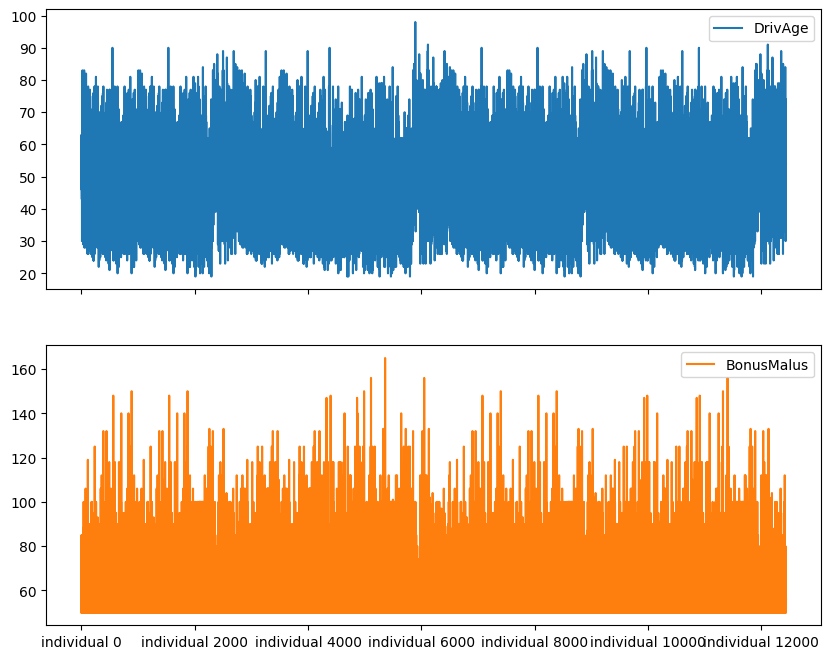

In [50]:
data_selection.plot(subplots=True, figsize=(10, 8));  # Columns vs index

#### Histogram

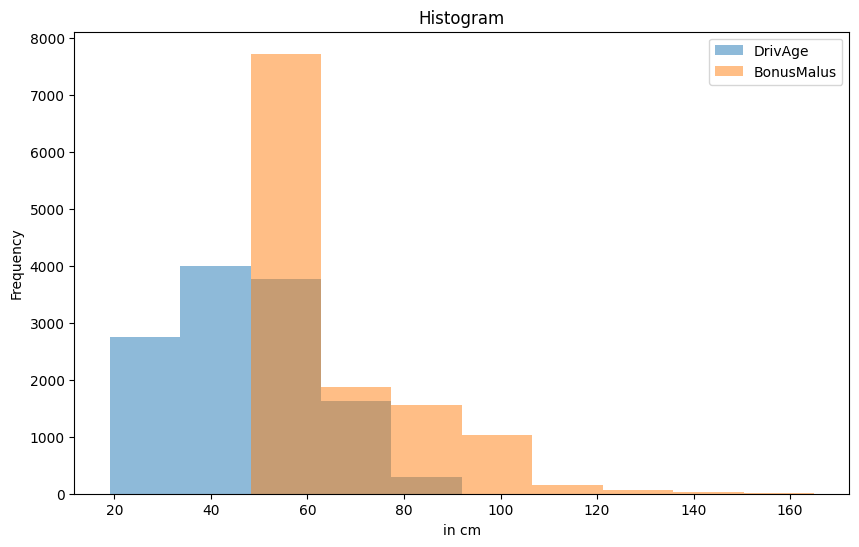

In [51]:
ax = data_selection.plot.hist(alpha=0.5, figsize=(10, 6))
ax.set_title("Histogram")
ax.set_xlabel("in cm");

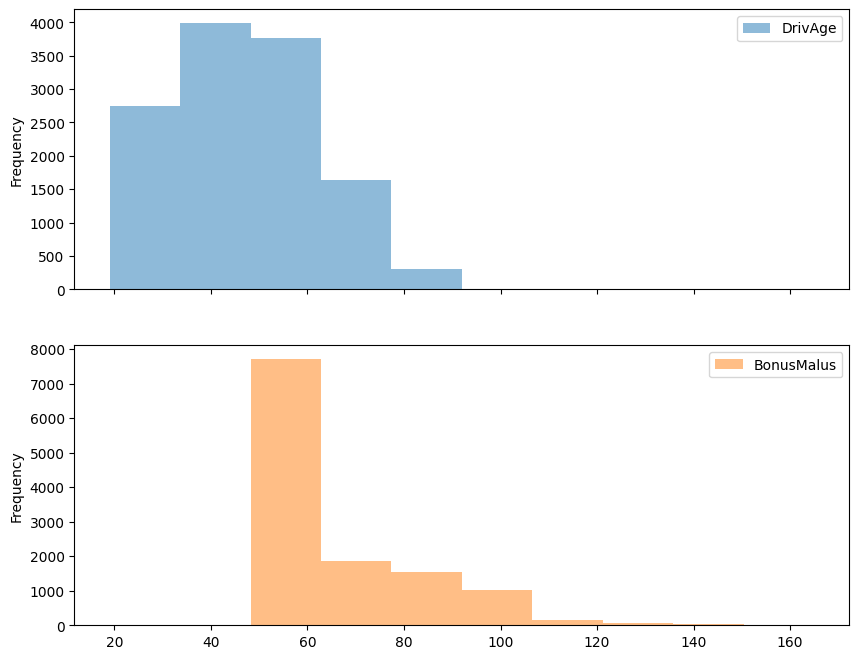

In [52]:
data_selection.plot.hist(alpha=0.5, subplots=True, figsize=(10, 8));

#### Box plot

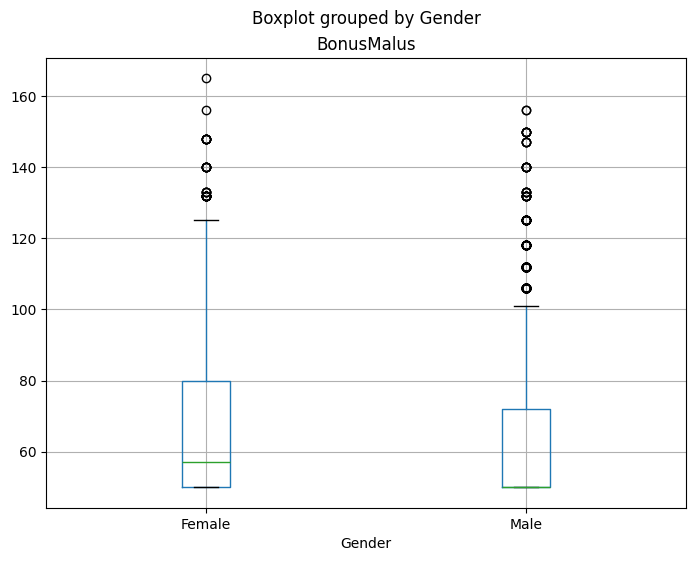

In [53]:

data_selection.boxplot(column=['BonusMalus'], by='Gender', figsize=(8, 6));


#### Scatter plot

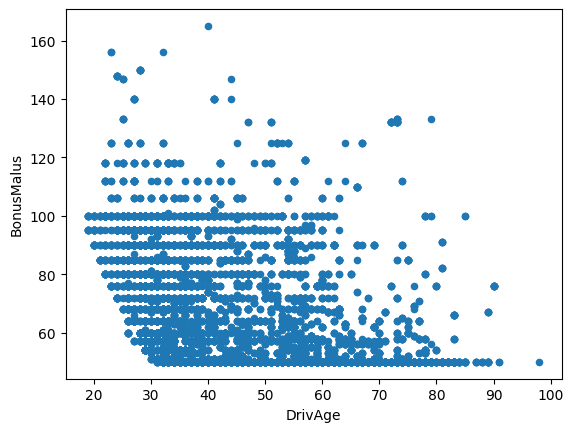

In [54]:
data_selection.plot.scatter(x="DrivAge", y="BonusMalus");

# Exercices: simple data pre-processing <a name="exos"></a>

As in the previous section, we consider the dataset `data_selection = raw_data[['DrivAge', 'Gender', 'BonusMalus', 'SocioCateg', 'DrivBehave']]`.

In [58]:
data_selection = raw_data[['DrivAge', 'Gender', 'BonusMalus', 'SocioCateg', 'DrivBehave']]
data_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12437 entries, individual 0 to individual 12436
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DrivAge     12437 non-null  int64 
 1   Gender      12437 non-null  object
 2   BonusMalus  12437 non-null  int64 
 3   SocioCateg  12437 non-null  object
 4   DrivBehave  12437 non-null  object
dtypes: int64(2), object(3)
memory usage: 841.0+ KB


#### Exercice 1

- Create a function named `transform_gender` that takes data as input. This function should return the same data with the feature `Gender` transformed using the following mapping: -1 for male and 1 for female (be sure that the values are int !). Additionally, print the number of men and women in the dataset.

- Create another function named `transform_drivbehave` that takes data as input. This function should return the same data with the feature `DrivBehave` transformed based on the mapping: 0 for BAD and 1 for GOOD (be sure that the values are int !). Additionally, print the number of GOOD and BAD drivers in the dataset.

#### Exercice 2

Create a function named `transform_socio_categ` that takes data as input. This function should return the same data with the feature `SocioCateg` transformed into integers ranging from 1 to 7 based on the decimal values of the numbers, excluding 'CSP'. Additionally, implement the following updates:
- Remove all observations where `SocioCateg` equals 7.
- Print a message displaying the number of removed observations.

#### Exercice 3

Create a function named `preprocess_categ_features` that accepts two parameters: `data` and a list of columns `categ_features`, which are intended to be (the name of the) categorical features. This function is designed to perform one-hot encoding on these features within the input dataset (For details, please refer to the 'Machine learning and statistics' section on [Wikipedia](https://en.wikipedia.org/wiki/One-hot)). The new columns will be named by prefixing the original feature name with the category. Additionally, manually identify the non-binary categorical feature(s) in `data_selection`, add them to a list, and then apply the just-defined function on it.